<b>Modules

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , KFold , StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

<b>Dataset

In [11]:
# Read the Dataset
Dataset = pd.read_csv("../data/Login_Data.csv")

# Display the Data
Dataset.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


In [12]:
# Display the Shape of the Dataset
print(f"Shape of the Dataset is : {Dataset.shape}")

Shape of the Dataset is : (31269264, 9)


In [13]:
# Find out the Duplicates Data
count_duplicate = Dataset.duplicated().sum()

# Display the Duplicated Data
print(f"Total Duplicated Data in the Dataset is : {count_duplicate}")

Total Duplicated Data in the Dataset is : 0


In [14]:
# Check the Nan Values in the Dataset
nanValues = Dataset.isnull().sum()
print(f"The Missing Values in the Dataset is : \n\n{nanValues}")

The Missing Values in the Dataset is : 

Login Timestamp                 0
User ID                         0
IP Address                      0
Country                         0
Region                      47409
City                         8590
Browser Name and Version        0
Device Type                  1526
Login Successful                0
dtype: int64


In [15]:
# Display the Information of the Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269264 entries, 0 to 31269263
Data columns (total 9 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Login Timestamp           object
 1   User ID                   int64 
 2   IP Address                object
 3   Country                   object
 4   Region                    object
 5   City                      object
 6   Browser Name and Version  object
 7   Device Type               object
 8   Login Successful          bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 1.9+ GB


<b>Find Unique Values Count of Important Columns

In [16]:
# Check the Unique Values in the (Region Column)
count_region = Dataset["Region"].value_counts()
print(f"Unique Values Count of Region Column is : \n\n{count_region}")

Unique Values Count of Region Column is : 

Region
-                         14013381
Oslo County                2314071
Viken                      1994024
Rogaland                   1713780
Innlandet                   834122
                            ...   
Distrikt Commewijne              1
Berane                           1
Jaunpils                         1
Fakaofo                          1
Parish of Saint Philip           1
Name: count, Length: 2638, dtype: int64


In [17]:
# Check the Unique Values in the (City Column)
count_city = Dataset["City"].value_counts()
print(f"Unique Values Count of City Column is : \n\n{count_city}")

Unique Values Count of City Column is : 

City
-                    13904552
Oslo                  2308651
Stavanger              526800
St Petersburg          516977
Bergen                 341021
                       ...   
Marcilly-sur-Eure           1
Kastornoye                  1
Tsudanuma                   1
Neudorf                     1
Chotoviny                   1
Name: count, Length: 38885, dtype: int64


In [18]:
# Check the Unique Values in the (Device Type Column)
count_device = Dataset["Device Type"].value_counts()
print(f"Unique Values Count of Device Type Column is : \n\n{count_device}")

Unique Values Count of Device Type Column is : 

Device Type
mobile     19642650
desktop     7934515
bot         2027834
unknown      867371
tablet       795368
Name: count, dtype: int64


In [19]:
# Check the Unique Values in the (Login Successful Column)
count_login = Dataset["Login Successful"].value_counts()
print(f"Unique Values Count of Login Successful Column is : \n\n{count_login}")

Unique Values Count of Login Successful Column is : 

Login Successful
False    18727822
True     12541442
Name: count, dtype: int64


<b>Preprocessing Dataset

Handle the Missing Values

In [20]:
# Handle the Missing Values for (Region Column)
Dataset["Region"].fillna("Oslo County" , inplace = True)

# Handle this Sign "_" 
Dataset["Region"] = Dataset["Region"].replace("-" , "Oslo County")

In [21]:
# Handle the Missing Values for (City Column)
Dataset["City"].fillna("Oslo" , inplace = True)

# Handle this Sign "_" 
Dataset["City"] = Dataset["City"].replace("-" , "Oslo")

In [22]:
# Handle the Missing Values for (Device Type)
Dataset["Device Type"].fillna("mobile" , inplace = True)

Handle the Categorical Data

In [23]:
# Handle the (Browser Name and Version Column) convert into Numerical Data

# Define The Function that Return the Browser Name
def browserName(text):
    browser_name = ""
    for index in range(0,len(text)):
        if text[index].isnumeric():
            break
        browser_name = browser_name + text[index]
    return browser_name.strip()

# Apply the Function in the (Browser Name and Version Column) 
Dataset["Browser Name"] = Dataset["Browser Name and Version"].apply(browserName)

In [24]:
# Create the Object of the LabelEncoder 
encoder = LabelEncoder()

In [25]:
# Convert the (Country Column) into Numerical Form
for col in ["Country" , "Region" , "City" , "Browser Name" , "Device Type"]:
    name = "Trans_" + col # Define the New Column Name 
    Dataset[name] = encoder.fit_transform(Dataset[col])

# Login Successful Column Convert into Numerical Column
Dataset["Login Successful"] = encoder.fit_transform(Dataset["Login Successful"])

Convert Data into Independent & Dependent Matrix

In [26]:
# Convert the Data into Dependent & Independent Matrix
X = Dataset.iloc[:,[10,11,12,13,14]].values
Y = Dataset.iloc[:,8].values

# Display the Shape of the X & Y Matrix
print(f"Shape of the X Matrix is : {X.shape}")
print(f"Shape of the Y Matrix is : {Y.shape}")

Shape of the X Matrix is : (31269264, 5)
Shape of the Y Matrix is : (31269264,)


Normalize the Data (Convert the Data in the Common Range)

In [27]:
# Create the Object of The MinMaxScaler
scaler = MinMaxScaler()

# Normalize tehe Data
X = scaler.fit_transform(X)

<b>Visualisation

In [28]:
Dataset.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,Browser Name,Trans_Country,Trans_Region,Trans_City,Trans_Browser Name,Trans_Device Type
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,Oslo County,Oslo,Firefox 20.0.0.1618,mobile,0,Firefox,153,1657,25237,46,2
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,Oslo County,Oslo,Chrome Mobile 46.0.2490,mobile,0,Chrome Mobile,11,1657,25237,24,2
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,1,Android,153,2470,35833,5,2
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,Oslo County,Oslo,Chrome Mobile WebView 85.0.4183,mobile,0,Chrome Mobile WebView,211,1657,25237,25,2
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,0,Chrome Mobile WebView,211,2489,1809,25,2


<b>Splitting Dataset into (Training & Testing)

In [29]:
# Split the Dataset into Training and Testing
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 42)

# Display the Shape of the Training and Testing Data
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the X Train is : {x_test.shape}")
print(f"Shape of the X Train is : {y_train.shape}")
print(f"Shape of the X Train is : {y_test.shape}")

Shape of the X Train is : (21888484, 5)
Shape of the X Train is : (9380780, 5)
Shape of the X Train is : (21888484,)
Shape of the X Train is : (9380780,)


<b>Machine Learning Models

In [30]:
# Define The Function that predict the Result
def predict_result(model , x_train = x_train , x_test = x_test , y_train = y_train , y_test = y_test):
    
    # Train the Model
    model.fit(x_train , y_train)
    
    # Predict the Result
    prediction = model.predict(x_test)
    
    # Calculate the Accuracy of the Model
    acc = accuracy_score(y_test , prediction)
    
    # Calculate the Classification Report
    class_report = classification_report(y_test , prediction)
    
    # Calculate the Confusion Matrix
    con_matrix = confusion_matrix(y_test , prediction)
    
    return model , prediction , acc , class_report , con_matrix

Logistic Regression Model

In [31]:
# Create the Object of the Lofistic Regression Model
model_lr = LogisticRegression()

# Call the predict result function and get the Results
model_lr , predict_lr , acc_lr , report_lr , matrix_lr = predict_result(model_lr)

In [32]:
# Display the Accuracy Score of the Logistic Regression Model 
print(f"Accuracy Score of the Logistic Regression Model is : {acc_lr}\n\n")

# Display the Classification Report of the Logistic Regression Model
print(f"Classification Report of the Logistic Regression Model is : \n\n{report_lr}")

Accuracy Score of the Logistic Regression Model is : 0.6224593264099574


Classification Report of the Logistic Regression Model is : 

              precision    recall  f1-score   support

           0       0.63      0.90      0.74   5617172
           1       0.58      0.21      0.31   3763608

    accuracy                           0.62   9380780
   macro avg       0.60      0.55      0.53   9380780
weighted avg       0.61      0.62      0.57   9380780



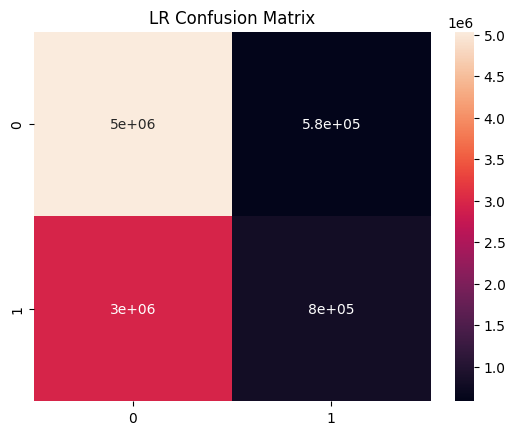

In [33]:
# Display the Confusion Matrix of the Logistic Regression 
sns.heatmap(matrix_lr , annot = True)
plt.title("LR Confusion Matrix")
plt.show()

Decision Tree Classifier Model

In [34]:
# Create the Object of the Decision Tree Classifier Model
model_dt = DecisionTreeClassifier()

# Call the predict result function and get the Results
model_dt , predict_dt , acc_dt , report_dt , matrix_dt = predict_result(model_dt)

In [35]:
# Display the Accuracy Score of the Decision Tree Classifier Model 
print(f"Accuracy Score of the Decision Tree Classifier Model is : {acc_dt}\n\n")

# Display the Classification Report of the Decision Tree Classifier Model
print(f"Classifiation Report of the Decision Tree Classifier Model is : \n\n{report_dt}")

Accuracy Score of the Decision Tree Classifier Model is : 0.7372940203266679


Classifiation Report of the Decision Tree Classifier Model is : 

              precision    recall  f1-score   support

           0       0.80      0.76      0.77   5617172
           1       0.66      0.71      0.68   3763608

    accuracy                           0.74   9380780
   macro avg       0.73      0.73      0.73   9380780
weighted avg       0.74      0.74      0.74   9380780



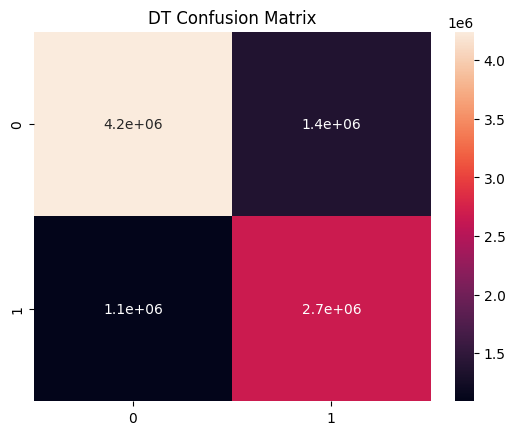

In [36]:
# Display the Confusion Matrix of the Decision Tree Classifier 
sns.heatmap(matrix_dt , annot = True)
plt.title("DT Confusion Matrix")
plt.show()

Support Vector Classifier Model

In [ ]:
# Create the Object of the Support Vector Classifier Model
model_sv = SVC()

# Call the predict result function and get the Results
model_sv , predict_sv , acc_sv , report_sv , matrix_sv = predict_result(model_sv)

In [ ]:
# Display the Accuracy Score of the Support Vector Classifier Model 
print(f"Accuracy Score of the Support Vector Classifier Model is : {acc_sv}\n\n")

# Display the Classification Report of the Support Vector Classifier Model
print(f"Classifiation Report of the Support Vector Classifier Model is : \n\n{report_sv}")

In [ ]:
# Display the Confusion Matrix of the Support Vector Classifier
sns.heatmap(matrix_sv , annot = True)
plt.title("SV Confusion Matrix")
plt.show()

<b>Display the Models Name and Accuracy

In [ ]:
# Define the Name of the Models
modelName = ['LogisticRegrssion' , 'DecisionTree' , "SupportVector"]

# Add the Accuracy of the Models
modelAcc = [acc_lr , acc_dt , acc_sv]

# Display the Result
sns.barplot(modelName , modelAcc)
plt.show()

<b>Save Best Model

In [ ]:
# Save the Decision Tree Classifier Model
pickle.dump(model_dt , open('dtModel.pkl' , 'wb'))
pickle.dump(encoder , open("Encoder.pkl" , "wb"))